In [46]:
import numpy as np
import matplotlib.pyplot as plt 


In [47]:
def lin_regress(x:np.ndarray, y:np.ndarray):#-> tuple(float, float):

    #number of the  training samplea
    N = x.shape[0]

    # normal form: A= [N, sum(x); sum(x),sum(x^2)]; b=[sum(y); sum(y*x)]
    A = np.array([ [N,np.sum(x)], [np.sum(x),np.sum(x**2)]  ])
    b = np.expand_dims(np.array([np.sum(y),np.sum(y*x)]), axis=-1)

    #solve Ax=b
    theta = np.linalg.solve(A,b).flatten()

    return (theta[0],theta[1])

In [48]:
import numpy as np

# Creating a 1D array
arr = np.array([[1, 2, 3],[2,8,4]])

# Expanding dimensions with axis=-1
expanded_arr = np.expand_dims(arr, axis=-1)

# print(arr)
# print(arr.shape)
# print('------')
# print( expanded_arr)

# print( expanded_arr.shape)
# print( expanded_arr[1][1])


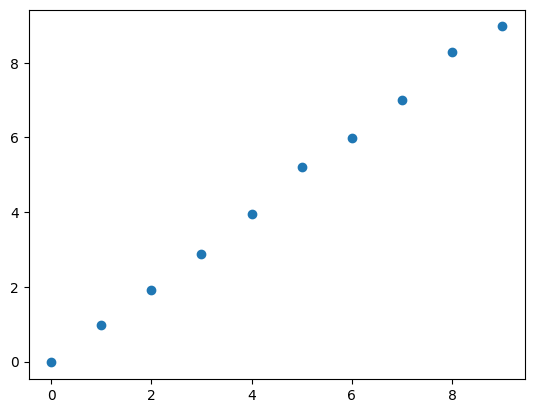

In [49]:
x=np.arange(0, 10, 1)
y_hat=x+0.1*np.random.randn(10)
plt.scatter(x, y_hat)


-0.06853755462572896 1.0186592157209131


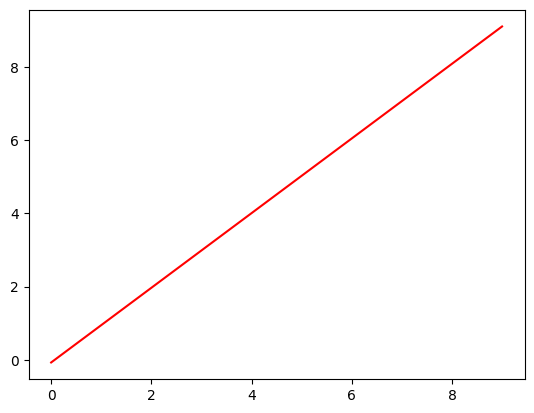

In [52]:
theta_0,theta_1 =lin_regress(x,y_hat)
print(theta_0,theta_1)


plt.plot(x, theta_0+theta_1 * x, color='red')

In [65]:
data = np.genfromtxt("driving_data.csv", delimiter=",")
velocity =data[:,0]
power=data[:,1]

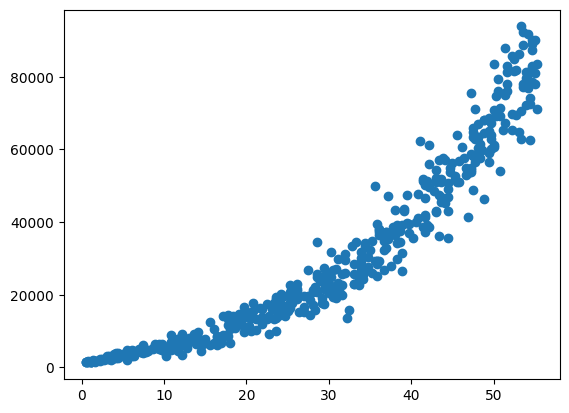

In [66]:
plt.scatter(velocity , power)



linear regression model: 	y = 1191.6353 + 0.0177 * x
rolling resistance 			cR = 0.0177


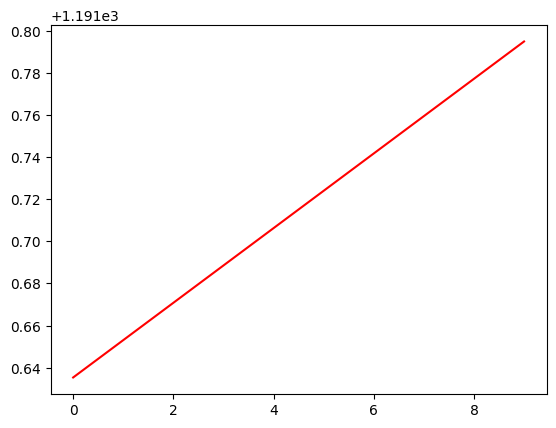

In [78]:
CW, A, RHO, G, M = 0.4, 1.5, 1.2, 9.81, 2400

def wind_resistance(v:np.ndarray)-> np.ndarray:
    return CW * A * (RHO * v ** 2) / 2

power_wo_wind = power - velocity * wind_resistance(v=velocity)
f_roll = power_wo_wind / velocity 
y = np.expand_dims(power_wo_wind, axis=1) 
X = np.expand_dims(velocity * M * G, axis=1)

# Least-squares lin. regression
theta = lin_regress(x=X, y=y) 
theta_0, theta_1 = theta[0], theta[1]
print(f'\nlinear regression model: \ty = {theta_0:.4f} + {theta_1:.4f} * x') 
print(f'rolling resistance \t\t\tcR = {theta_1:.4f}')
plt.plot(x, theta_0+theta_1 * x, color='red')
